<a href="https://www.kaggle.com/code/aizakpan/eda-on-global-video-game-sales-ratings-by-isaac?scriptVersionId=120150823" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# EDA on "Global Video Game Sales Ratings" by Isaac Pan

## Introduction

This exploratory data analysis (EDA) performed on the data: "Global Video Game Sales Ratings" includes data cleaning process, data transformation, analysis and sharing business recommendations.

During the analysis process, I found "Shooter" games are incredibly popular in North America and Europe. On the flip side, they don't seem to resonate with gamers in Japan and ranked as one of the least popular genre. Therefore, I dig deeper into the data and generated business recommendations for game developers, such as Nintendo, at the end of this EDA.

Credit:
Poutanen, Timo. (2018). Digital Humanities Project: Effects of Storytelling in Video Game Ratings and Sales. https://doi.org/10.5281/zenodo.2454579

## Table of Content

##### 1. Data Understanding
##### 2. Data Processing
##### 3. Feature Understanding
##### 4. Feature Relationships
##### 5. Analysis of Video Game Sales
##### 6. Business Recommendations

In [1]:
# Import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import and data preview

df = pd.read_csv("/kaggle/input/global-video-game-sales-ratings/Raw Data.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Data Understanding

In [3]:
# Data Understanding, create a function that pass dataframe and get info about data 

def understand(df):
    rows, columns = df.shape
    lst_columns = df.columns
    datatypes = df.dtypes
    
    print(f'The dataset has {rows} rows and {columns} columns')
    print(' ')
    print(f'Columns: {lst_columns}')
    print(' ')
    print(f'Datatypes: {datatypes}')

In [4]:
understand(df)

The dataset has 16719 rows and 16 columns
 
Columns: Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')
 
Datatypes: Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object


- *Note1: "Year_of_Release" should be integer instead of float
- *Note2: "User_Score" should be float instead of object

#### 1.1 Categorical/ Object Data Understanding

In [5]:
# create a function that directly extract number of unique values from dataframe

def nunique_object_data(df):
    object_type = df.dtypes == 'object' # boolean mask for object columns
    filtered_list = object_type.index[object_type].tolist() # get a list of column name that meet the datatype
    return df[filtered_list].nunique()

In [6]:
nunique_object_data(df)

Name          11562
Platform         31
Genre            12
Publisher       581
User_Score       96
Developer      1696
Rating            8
dtype: int64

- Note3: "Genre" and "Rating" could be casted to category type

#### 1.2 Numerical Data Understanding

In [7]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


## 2. Data Processing

#### 2.1 Handling Missing Values

In [8]:
# Number of missing data
missing_value_cnt = df.isna().sum()
missing_value_cnt

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [9]:
# Percentage of data missing

ttl_cells = np.product(df.shape)
ttl_missing_values = missing_value_cnt.sum()

pct_of_missing = (ttl_missing_values/ttl_cells)*100
print(f'{ttl_missing_values} out of {ttl_cells} ({pct_of_missing:.2f}%) missing')

46716 out of 267504 (17.46%) missing


In [10]:
# As all features in this dataset are going to be used in this analysis
# ,drop the rows that contain any missing value

df = df.dropna(how='any')\
    .reset_index(drop=True)\
    .copy()

#### 2.2 Handling Duplicated Values

In [11]:
# Rows that are duplicated

df[df.duplicated()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


In [12]:
# Duplicated values in "Name" column

df.loc[df.duplicated(subset=['Name'])]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
13,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
20,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.24,0.07,1.12,13.67,83.0,73.0,4.8,2256.0,Treyarch,M
22,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.73,0.49,1.57,13.32,88.0,39.0,3.2,5234.0,"Infinity Ward, Sledgehammer Games",M
26,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.99,4.37,0.48,1.79,12.63,88.0,58.0,6.4,1094.0,Treyarch,M
27,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6812,Saints Row: Gat out of Hell,XOne,2015.0,Action,Deep Silver,0.00,0.01,0.00,0.00,0.01,65.0,16.0,6,27.0,Volition Inc.,M
6814,Legacy of Kain: Defiance,PC,2003.0,Action,Eidos Interactive,0.00,0.01,0.00,0.00,0.01,70.0,11.0,8.7,67.0,Nixxes Software,M
6817,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,Milestone S.r.l,0.00,0.01,0.00,0.00,0.01,63.0,8.0,8.2,22.0,Milestone S.r.l,E
6821,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M


*Note: There are duplicated values in "Name" column because they are available on different platform

In [13]:
# Check if there are duplicated rows across "Name" and "Platform" fields

df.loc[df.duplicated(subset=['Name','Platform'])]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1016,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.0,0.13,0.02,0.10,1.25,83.0,54.0,8.5,134.0,EA Canada,T
5675,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0.0,0.06,0.00,0.02,0.08,82.0,19.0,8.5,525.0,Black Box,T
6755,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.0,0.01,0.00,0.00,0.01,83.0,22.0,5.5,101.0,EA Tiburon,E


*Note:
After research, "Need for Speed: Most Wanted" have two versions in 2005 and 2012, therefore, I will rename these values.

In [14]:
df.loc[1016,'Name'] = 'Need for Speed: Most Wanted 2005'
df.loc[5675,'Name'] = 'Need for Speed: Most Wanted 2012'
df.loc[[1016, 5675],'Name']

1016    Need for Speed: Most Wanted 2005
5675    Need for Speed: Most Wanted 2012
Name: Name, dtype: object

In [15]:
df.loc[df['Name'] == 'Madden NFL 13']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
347,Madden NFL 13,X360,2012.0,Sports,Electronic Arts,2.53,0.15,0.0,0.17,2.86,81.0,36.0,5.8,179.0,EA Tiburon,E
408,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.22,0.0,0.23,2.56,83.0,22.0,5.5,101.0,EA Tiburon,E
3366,Madden NFL 13,PSV,2012.0,Sports,Electronic Arts,0.28,0.00,0.0,0.02,0.30,63.0,6.0,7.3,38.0,EA Tiburon,E
3879,Madden NFL 13,WiiU,2012.0,Sports,Electronic Arts,0.21,0.00,0.0,0.02,0.23,75.0,9.0,6.7,30.0,EA Tiburon,E
6755,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.0,0.00,0.01,83.0,22.0,5.5,101.0,EA Tiburon,E


*Note: Row 408 and row 6755 are same game and on same platform, confirm they're  duplicated

In [16]:
# Drop row 6755

df = df.loc[~df.duplicated(subset=['Name','Platform'])].reset_index(drop=True).copy()

#### 2.3 Inconsistent Data Entry

In [17]:
# Check inconsistency data entry for each game

consis_check1 = df.groupby(['Name', 'Platform', 'Year_of_Release', 'Genre', 
           'Publisher','Developer', 'Rating'])['Name'].count().to_frame()

consis_check1.query('Name > 1')

,,,,,,,Name
Name,Platform,Year_of_Release,Genre,Publisher,Developer,Rating,


In [18]:
consis_check2 = df.groupby(['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales',
                            'Other_Sales', 'Global_Sales', 'Critic_Score',
                            'Critic_Count', 'User_Score', 'User_Count'])['Name'].count().to_frame()
consis_check2.query('Name > 1')

,,,,,,,,,,Name
Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,


Given the result of "consis_check1" and "consis_check2", there's no inconsistent data entry for every game.

#### 2.4 Data Formatting

According to "Note1" and "Note2":
1. Cast "Year_of_Release" to be integer
2. Cast "User_Score" to float
3. Cast "Genre" and "Rating" to be category type for faster data processing

In [19]:
df['Year_of_Release'] = df['Year_of_Release'].astype('int')
df['User_Score'] = df['User_Score'].astype('float')
df[['Genre','Rating']] = df[['Genre','Rating']].astype('category')
df.dtypes

Name                 object
Platform             object
Year_of_Release       int64
Genre              category
Publisher            object
NA_Sales            float64
EU_Sales            float64
JP_Sales            float64
Other_Sales         float64
Global_Sales        float64
Critic_Score        float64
Critic_Count        float64
User_Score          float64
User_Count          float64
Developer            object
Rating             category
dtype: object

## 3. Feature Understanding

#### 3.1 Categorical Features

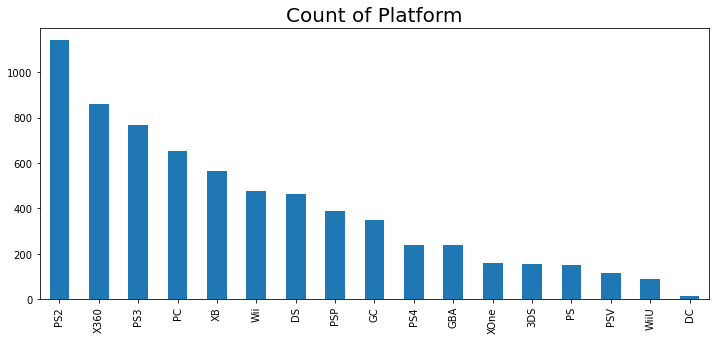

In [20]:
# 3.1.1 Count of platform 
ax = df['Platform'].value_counts().plot(kind='bar', figsize=(12, 5))
ax.set_title('Count of Platform', fontsize=20)

plt.show()

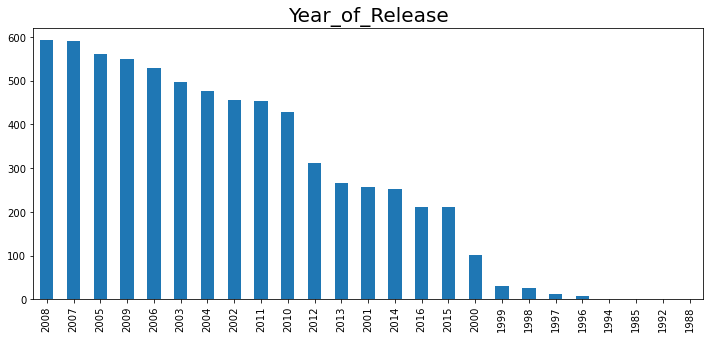

In [21]:
# 3.1.2 Count of each year
ax = df['Year_of_Release'].value_counts().plot(kind='bar', figsize=(12, 5))
ax.set_title('Year_of_Release', fontsize=20)

plt.show()

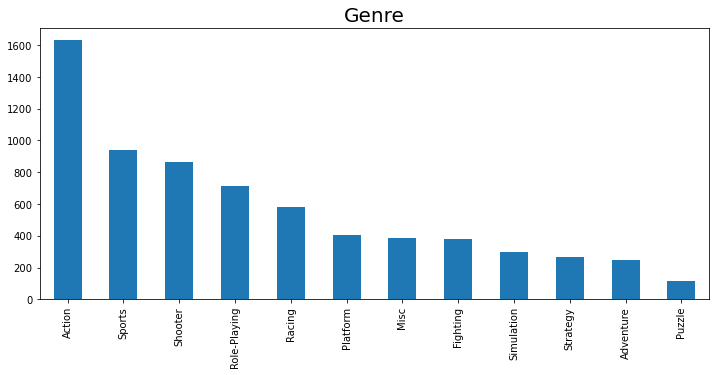

In [22]:
# 3.1.3 Count of each Genre
ax = df['Genre'].value_counts().plot(kind='bar', figsize=(12, 5))
ax.set_title('Genre', fontsize=20)

plt.show()

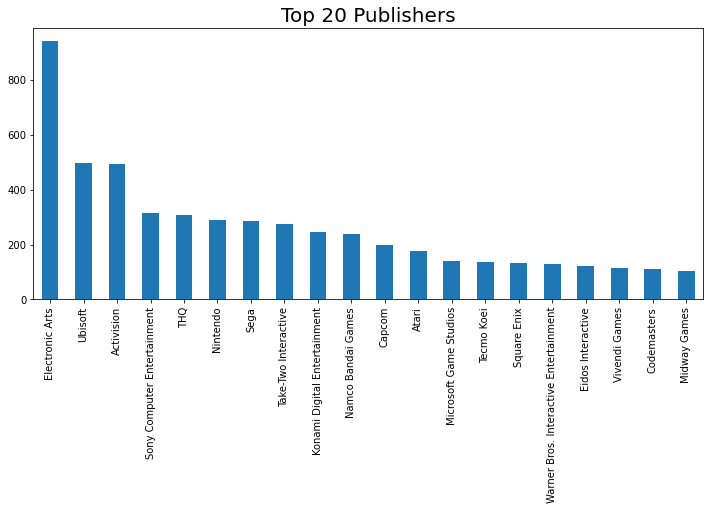

In [23]:
# 3.1.4 Count of each Top 20 Publishers
top_20_publishers = df['Publisher'].value_counts().head(20)

ax = top_20_publishers.plot(kind='bar', figsize=(12, 5))
ax.set_title('Top 20 Publishers', fontsize=20)

plt.show()

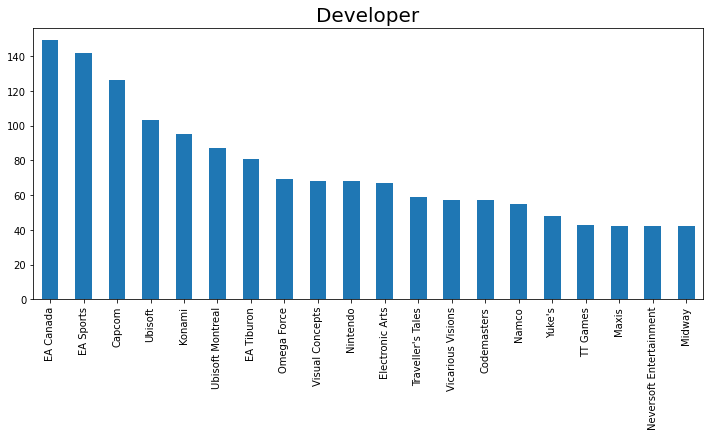

In [24]:
# 3.1.5 Count of each Developer. Top 20 developers
top_20_developer = df['Developer'].value_counts().head(20)

ax = top_20_developer.plot(kind='bar', figsize=(12, 5))
ax.set_title('Developer', fontsize=20)

plt.show()

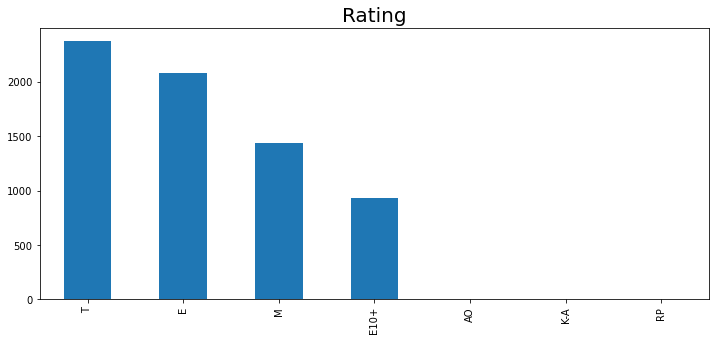

In [25]:
# 3.1.6 Count of each Rating
ax = df['Rating'].value_counts().plot(kind='bar', figsize=(12, 5))
ax.set_title('Rating', fontsize=20)

plt.show()

#### 3.2 Numerical Features

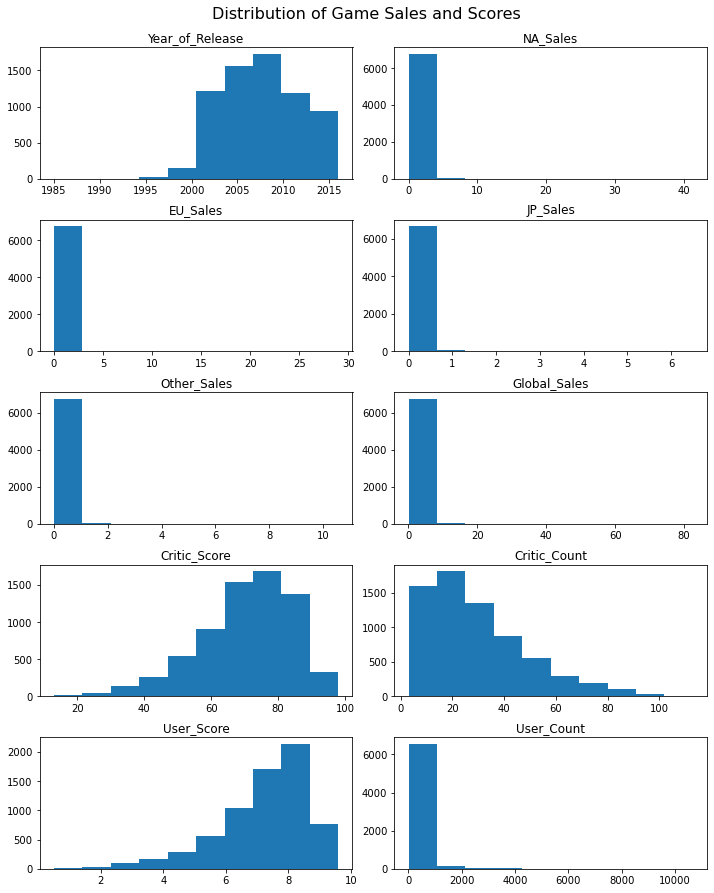

In [26]:
# Distribution of each numerical variable

fig, ax = plt.subplots(5,2, figsize=(10,12))
fig.tight_layout(h_pad=2)

fig.suptitle('Distribution of Game Sales and Scores', fontsize=16, y=1.03)

features = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 
          'Other_Sales', 'Global_Sales', 'Critic_Score', 
          'Critic_Count', 'User_Score', 'User_Count']

for i, feature in enumerate(features):
    ax[i//2, i%2].set_title(feature)
    ax[i//2, i%2].hist(df[feature])

plt.show()

## 4. Feature Relationships

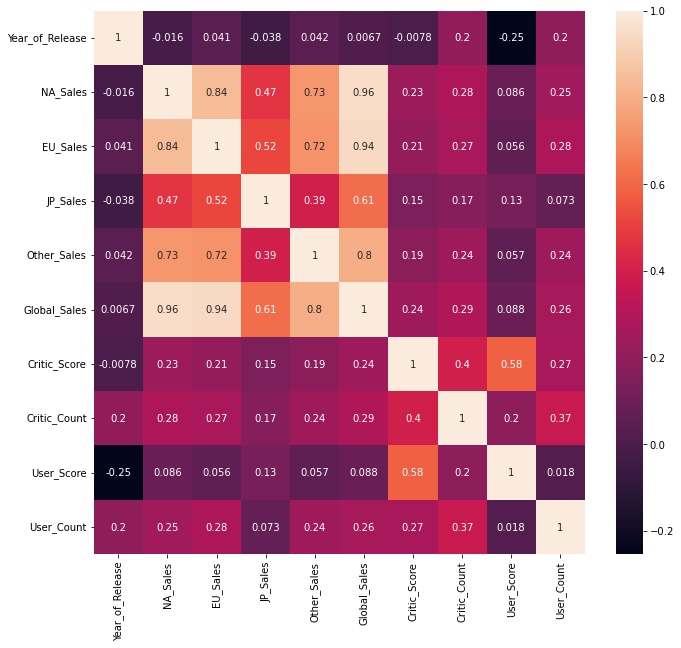

In [27]:
# Correlation between each numerical variable

corr = df.corr()

fig, ax = plt.subplots(figsize=(11,10))
sns.heatmap(corr, annot=True)

plt.show()

##### Discoveries from correlation
1. Sales in different regions have mid-high correlations between each other
2. Critic_Score has high correlation with User_Score

## 5. Analysis of Video Game Sales

#### 5.1 What are the best genre by regions?

In [28]:
# Subsetting features for analysis
genre_sales = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Global_Sales']].copy()
genre_sales.set_index('Genre', inplace=True)

# Reshape the dataframe
genre_sales = genre_sales.reset_index().melt(id_vars=['Genre'], var_name='Region', value_name='Sales')

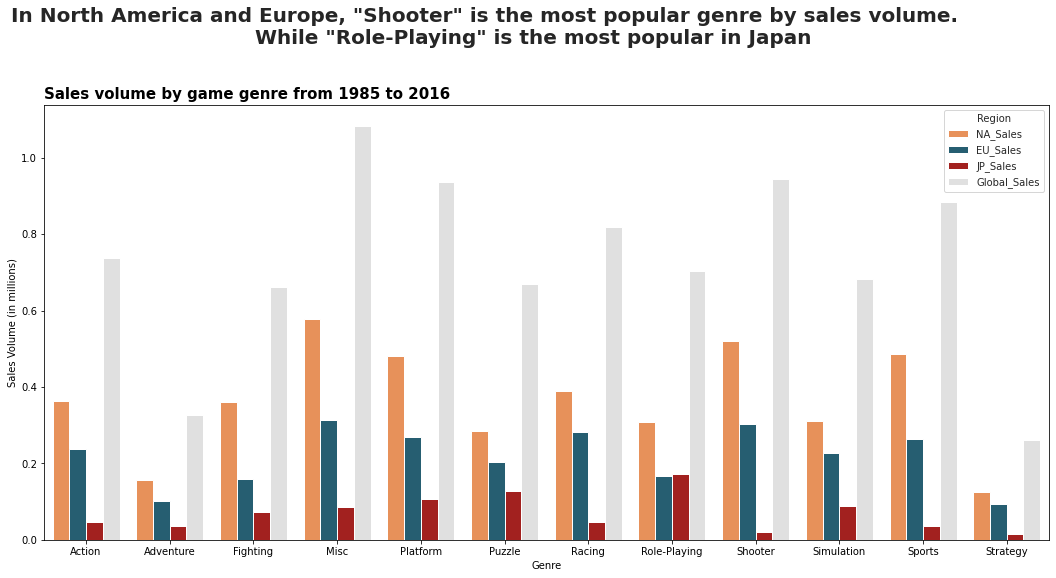

In [29]:
fig, ax = plt.subplots(figsize=(18,8))

palette = {'NA_Sales': '#FF8C42', 'EU_Sales': '#19647E', 'JP_Sales': '#B80C09', 'Global_Sales': '#E0E0E0'}

sns.set_style('whitegrid')
sns.barplot(data=genre_sales, x='Genre',y='Sales',hue='Region', ci=None, ax=ax, palette=palette)

plt.suptitle('In North America and Europe, "Shooter" is the most popular genre by sales volume. \
            \n While "Role-Playing" is the most popular in Japan', y=1.05,fontsize=20, fontweight='bold')
plt.title('Sales volume by game genre from 1985 to 2016', loc='left', fontsize=15, fontweight='bold')
plt.ylabel('Sales Volume (in millions)')

plt.show()

##### 5.1 Summary:
It's interesting to note that while "Shooter" games are incredibly popular in North America and Europe, they just don't seem to resonate with gamers in Japan. In fact, when we look at the data, "Shooter" is ranked as one of the least popular genres in Japan, falling to the bottom two spots.

Let's dive in further in "Shooter" games.

#### 5.2 "Shooter" Games In-Depth Analysis

In [30]:
# Shooter" games sales analysis:
shooter = df.query('Genre == "Shooter"').reset_index(drop=True).copy()
shooter = shooter.drop(['Platform','Genre'],axis=1)

shooter = shooter.groupby(['Name','Year_of_Release','Publisher','Developer'])[['NA_Sales','EU_Sales','JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count']].sum().reset_index()
shooter_na = shooter[['Name', 'NA_Sales']].sort_values(by=['NA_Sales'],ascending=False).reset_index(drop=True)
shooter_eu = shooter[['Name', 'EU_Sales']].sort_values(by=['EU_Sales'],ascending=False).reset_index(drop=True)
shooter_jp = shooter[['Name', 'JP_Sales']].sort_values(by=['JP_Sales'],ascending=False).reset_index(drop=True)

In [31]:
# Top 10 Shooter Game in each region

ranking = pd.concat([shooter_na,shooter_eu,shooter_jp], axis=1)
ranking.head(10)

,Name,NA_Sales,Name,EU_Sales,Name,JP_Sales
0,Call of Duty: Black Ops,16.49,Call of Duty: Modern Warfare 3,10.95,Splatoon,1.46
1,Call of Duty: Modern Warfare 3,14.99,Call of Duty: Black Ops II,10.84,Resident Evil 6,0.95
2,Call of Duty: Ghosts,14.49,Call of Duty: Black Ops,8.50,Call of Duty: Black Ops II,0.72
3,Call of Duty: Black Ops II,14.08,Call of Duty: Ghosts,8.39,Call of Duty: Modern Warfare 3,0.62
4,Call of Duty: Modern Warfare 2,13.52,Call of Duty: Modern Warfare 2,8.02,Call of Duty: Black Ops,0.59
5,Call of Duty 4: Modern Warfare,9.04,Battlefield 3,6.43,Dirge of Cerberus: Final Fantasy VII,0.52
6,Battlefield 3,8.20,Call of Duty 4: Modern Warfare,5.74,Call of Duty: Ghosts,0.47
7,Halo 3,7.97,Battlefield 4,5.43,Battlefield 4,0.46
8,Call of Duty: World at War,7.56,Call of Duty: Advanced Warfare,5.26,Call of Duty: Modern Warfare 2,0.46
9,Halo: Reach,7.04,Call of Duty: World at War,3.85,Yakuza: Dead Souls,0.42


##### 5.2 Summary:

In North America and Europe, "Shooter" games dominate the best-seller lists, with popular series like:

* Call of Duty series
* Battlefield

However, the story is different in Japan, where gamers have more diverse tastes. Gamers might be more interested in games that offer unique gameplay mechanics or have a strong emphasis on storytelling and character development.

#### 5.3 Role-Playing Game in Japan

In [32]:
# "Role-Playing" games sales analysis:

role = df.query('Genre == "Role-Playing"').reset_index(drop=True).copy()
role = role.drop(['Platform','Genre'],axis=1)

role = role.groupby(['Name','Year_of_Release','Publisher','Developer'])[['NA_Sales','EU_Sales','JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count']].sum().reset_index()
role_na = role[['Name', 'NA_Sales']].sort_values(by=['NA_Sales'],ascending=False).reset_index(drop=True)
role_eu = role[['Name', 'EU_Sales']].sort_values(by=['EU_Sales'],ascending=False).reset_index(drop=True)
role_jp = role[['Name', 'JP_Sales']].sort_values(by=['JP_Sales'],ascending=False).reset_index(drop=True)

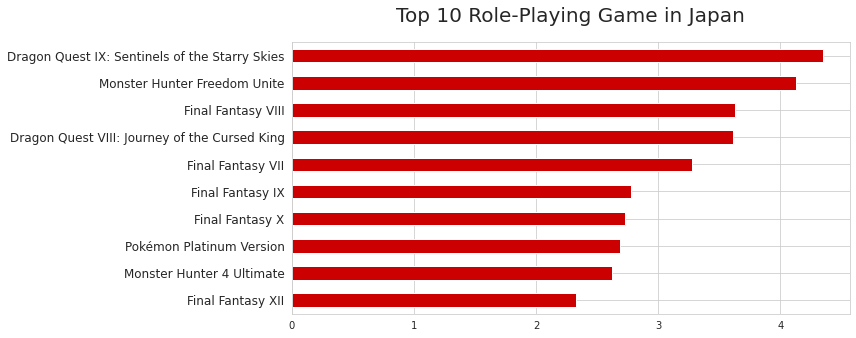

In [33]:
# Bar plot for top 10 Role-Playing Game in Japan

top10_roleplaying = role_jp.head(10).set_index('Name').sort_values(by=['JP_Sales'], ascending=True)

ax = top10_roleplaying.plot(kind='barh', color=['#CC0000'], figsize=(10,5))
ax.set_title('Top 10 Role-Playing Game in Japan', fontsize=20, pad=20)
ax.set(ylabel=None)
ax.legend().remove()
plt.yticks(fontsize=12)

plt.show()

##### 5.3 Summary:
On the aspect of "Role-Playing" games, Japanese players are tended to play:

* Dragon Quest
* Monster Hunter
* Final Fantasy

#### 5.4 Top Developer for Japanese Market

In [34]:
# Top 10 developers that make the most game sales in Japan

developer_jp = df.groupby('Developer')['JP_Sales'].sum().sort_values(ascending=False)
developer_jp.head(10)

Developer
Nintendo             88.82
Capcom               32.72
SquareSoft           21.50
Square Enix          16.06
Omega Force          14.36
Level 5              13.63
Namco                10.96
Polyphony Digital     8.98
Konami                8.68
HAL Labs              8.06
Name: JP_Sales, dtype: float64

In [35]:
# Nintendo developed games

genre_nintendo = df.query("Developer == 'Nintendo'")\
                .groupby('Genre')['Genre']\
                .count()\
                .sort_values(ascending=False)\
                .to_frame('Genre of Games Developed')

genre_nintendo.style.highlight_min()

,Genre of Games Developed
Genre,
Platform,15
Action,12
Misc,8
Puzzle,6
Sports,6
Adventure,5
Simulation,5
Racing,4
Shooter,4


##### 5.4 Summary

*Note: While "Role-Playing" games is the No.1 preference in terms of sales volume in Japan, it's surprising to note that Nintendo, the leading game developer in Japan, has yet to release any "Role-Playing" games.

## 6. Business Recommendations

#### 6.1 Recommendations

1. For Nintendo (as developer):

    As "Role-Playing" is the favorite genre in Japan, yet till 2016 they haven't developed this type of game. As the leading game developer in Japan, they may consider creating "Role-Playing" games to tap into this massive market and diversify their game offerings.


2. For others developers:

    a. Entering Japanese market: 
     
      Developers who focus on "Role-Playing" games can consider expanding their reach in Japan, where this genre is highly popular.
        

    b. As there's a preference of Role-Playing games in Japan, especially strong preferences on these series:

    * Dragon Quest
    * Final Fantasy
    * Monster Hunter

    In addition, given the low sales volumes of "Shooter" and "Strategy" games, this suggests that the market of these two genres have potential to grow with catering their unique preference. For instance, I would recommend that developers in Japan could seek the for the cooperation with developers of these three games and develop a "Role-Playing" - "Shooter" hybrid games based on those stories.




#### 6.2 Next Step:

To see the potential of the idea of fusing the top 3 "Role-Playing" based games and "Shooter" games, I will conduct survey on Japanese game lovers especially lovers/ players of these 3 "Role-Playing" games. Also ask what elements they would like to see included in this new type of game. It will further help me to gain insights that will inform the analysis and make recommendations to game developers who are interested in exploring this new genre.

# Thank you! Let me know if you have any comment.
## Let's connect: https://www.linkedin.com/in/isaacpan/